> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [5]:

# =============================
# 1. MATPLOTLIB
# =============================
%matplotlib inline
import matplotlib.pyplot as plt

# Tema do Matplotlib
plt.style.use('seaborn-v0_8-darkgrid')   # exemplo de tema mais moderno


# =============================
# 2. SEABORN
# =============================
import seaborn as sns

# Tema do Seaborn
sns.set_theme(style="darkgrid", palette="deep")


# 3. PLOTLY
# =============================
import plotly.express as px
import plotly.graph_objects as go

# Tema do Plotly
import plotly.io as pio
pio.templates.default = "plotly_dark"

import sys
sys.executable



'c:\\Users\\wagner\\AppData\\Local\\Programs\\Python\\Python314\\python.exe'

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

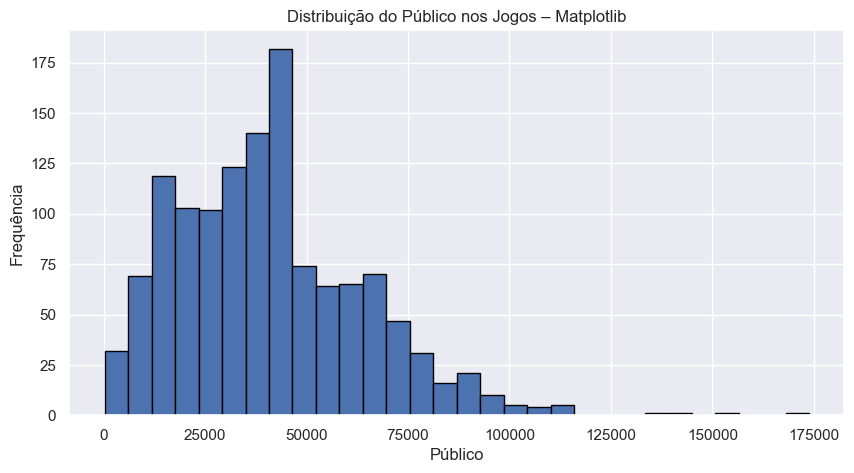

In [10]:
#### Solução com matplotlib
import pandas as pd

df = pd.read_csv("wc_formatado.csv")   # ajuste o caminho se necessário

df_clean = df[df["comparecimento"] > 0]   # REMOVE públicos zerados

df_clean.head()

plt.figure(figsize=(10,5))
plt.hist(df_clean["comparecimento"], bins=30, edgecolor='black')

plt.title("Distribuição do Público nos Jogos – Matplotlib")
plt.xlabel("Público")
plt.ylabel("Frequência")

plt.show()



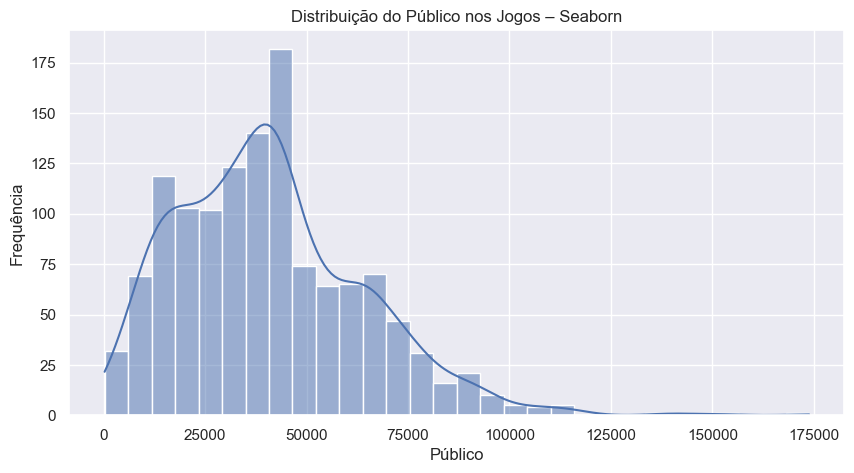

In [11]:
#### solução com seaborn
plt.figure(figsize=(10,5))
sns.histplot(df_clean["comparecimento"], bins=30, kde=True)

plt.title("Distribuição do Público nos Jogos – Seaborn")
plt.xlabel("Público")
plt.ylabel("Frequência")

plt.show()



In [13]:
#### solução com plotly

import plotly.io as pio
pio.renderers.default = "browser"

fig = px.histogram(
    df_clean,
    x="comparecimento",
    nbins=30,
    title="Distribuição do Público nos Jogos – Plotly"
)

fig.update_layout(
    xaxis_title="Público",
    yaxis_title="Frequência"
)

fig.show()



#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

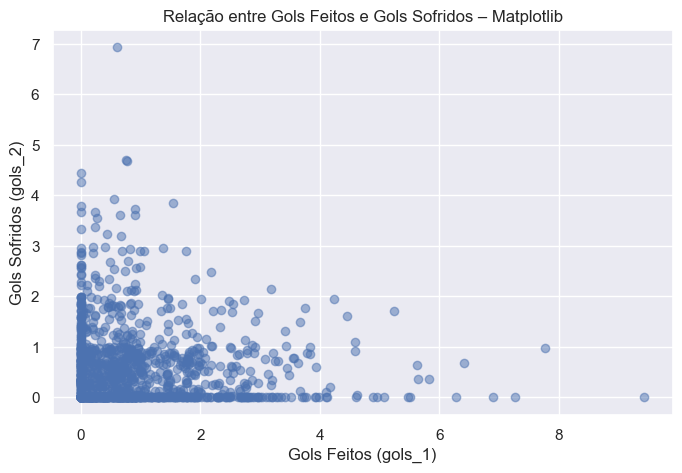

In [21]:
#### solução com matplotlib
import pandas as pd

wc = pd.read_csv("wc_formatado.csv")
wc.head()

import numpy as np

gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))
gols.head()
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(gols["gols_1"], gols["gols_2"], alpha=0.5)

plt.title("Relação entre Gols Feitos e Gols Sofridos – Matplotlib")
plt.xlabel("Gols Feitos (gols_1)")
plt.ylabel("Gols Sofridos (gols_2)")

plt.show()





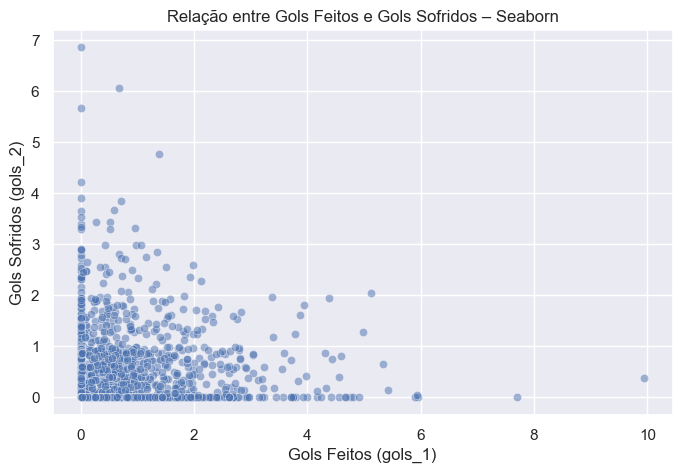

In [22]:
#### solução com seaborn
#### solução com seaborn

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a distorção nos dados
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

# Plotar
plt.figure(figsize=(8,5))

sns.scatterplot(
    x=gols["gols_1"],
    y=gols["gols_2"],
    alpha=0.5
)

plt.title("Relação entre Gols Feitos e Gols Sofridos – Seaborn")
plt.xlabel("Gols Feitos (gols_1)")
plt.ylabel("Gols Sofridos (gols_2)")
plt.show()



In [25]:
#### solução com plotly
import pandas as pd

wc = pd.read_csv("wc_formatado.csv")
import numpy as np
import plotly.express as px

# Criar leve distorção para espalhar melhor os pontos
gols = wc[['gols_1', 'gols_2']] + np.random.normal(0, 0.15, size=(len(wc), 2))

# Criar scatter plot com Plotly
fig = px.scatter(
    gols,
    x="gols_1",
    y="gols_2",
    title="Relação entre Gols Feitos e Gols Sofridos – Plotly",
    labels={
        "gols_1": "Gols Feitos",
        "gols_2": "Gols Sofridos"
    },
    opacity=0.6
)

fig.show()




#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

Home: home_team  | Away: away_team
Home: home_team  | Away: away_team


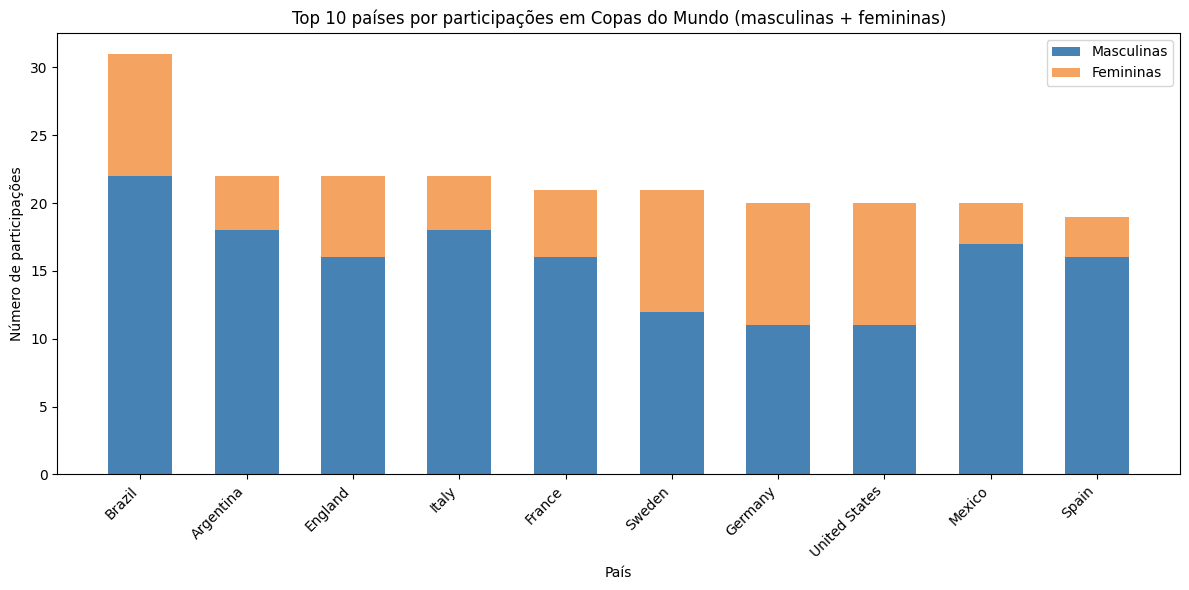

In [8]:
import pandas as pd

# === Carregar arquivos ===
df_m = pd.read_csv("matches_1930_2022.csv")   # masculino
df_f = pd.read_csv("matches_1991_2023.csv")   # feminino

# === Função segura para achar colunas de time ===
def find_team_columns(df):
    possibles_home = ["Home Team Name", "Home Team", "home_team", "Team 1"]
    possibles_away = ["Away Team Name", "Away Team", "away_team", "Team 2"]

    home = next((c for c in possibles_home if c in df.columns), None)
    away = next((c for c in possibles_away if c in df.columns), None)

    print("Home:", home, " | Away:", away)
    return home, away

home_m, away_m = find_team_columns(df_m)
home_f, away_f = find_team_columns(df_f)

# === Função para calcular participações ===
def get_participations(df, home, away):
    df2 = df[["Year", home, away]].copy()
    df2 = df2.melt(id_vars="Year", value_vars=[home, away], value_name="Team")
    df2 = df2.dropna(subset=["Team"])
    df2 = df2.drop_duplicates(subset=["Year", "Team"])
    return df2.groupby("Team")["Year"].nunique().rename("Participations")

# === Participações masculinas e femininas ===
part_m = get_participations(df_m, home_m, away_m)
part_f = get_participations(df_f, home_f, away_f)

# === Juntar ===
part = pd.concat([part_m, part_f], axis=1)
part.columns = ["Participations_male", "Participations_female"]
part = part.fillna(0)

# === Calcular total ===
part["Participations_total"] = part["Participations_male"] + part["Participations_female"]

# === Selecionar TOP 10 ===
top10 = part.sort_values("Participations_total", ascending=False).head(10)

top10
import matplotlib.pyplot as plt
import numpy as np

# dados
countries = top10.index.tolist()  # <<< aqui corrigido!
male = top10["Participations_male"].tolist()
female = top10["Participations_female"].tolist()

x = np.arange(len(countries))
width = 0.6

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x, male, width, label="Masculinas", color="steelblue")
ax.bar(x, female, width, bottom=male, label="Femininas", color="sandybrown")

ax.set_xlabel("País")
ax.set_ylabel("Número de participações")
ax.set_title("Top 10 países por participações em Copas do Mundo (masculinas + femininas)")
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


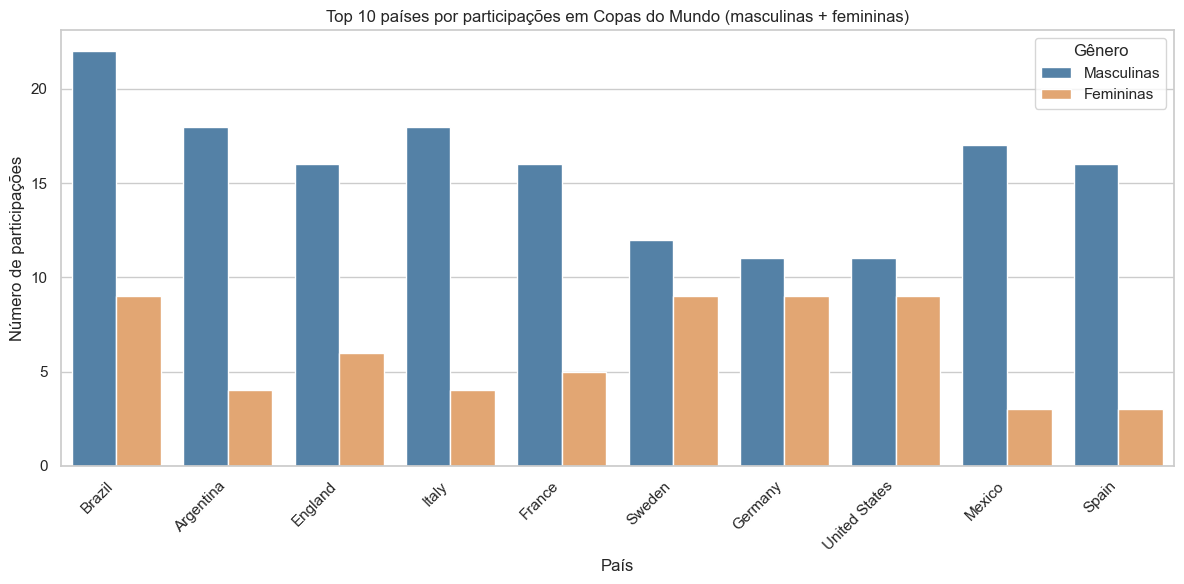

In [9]:
import pandas as pd

df_m = pd.read_csv("matches_1930_2022.csv")
df_f = pd.read_csv("matches_1991_2023.csv")

# Detectar colunas de time automaticamente
def find_team_columns(df):
    homes = ["Home Team Name", "Home Team", "home_team", "Team 1"]
    aways = ["Away Team Name", "Away Team", "away_team", "Team 2"]

    home = next((c for c in homes if c in df.columns), None)
    away = next((c for c in aways if c in df.columns), None)
    return home, away

home_m, away_m = find_team_columns(df_m)
home_f, away_f = find_team_columns(df_f)

# Função para participações
def get_participations(df, home, away):
    df2 = df[["Year", home, away]].copy()
    df2 = df2.melt(id_vars="Year", value_vars=[home, away], value_name="Team")
    df2 = df2.dropna(subset=["Team"])
    df2 = df2.drop_duplicates(subset=["Year", "Team"])
    return df2.groupby("Team")["Year"].nunique()

part_m = get_participations(df_m, home_m, away_m)
part_f = get_participations(df_f, home_f, away_f)

# Montar tabela final
top10 = pd.concat([part_m, part_f], axis=1)
top10.columns = ["Participations_male", "Participations_female"]
top10 = top10.fillna(0)
top10["Participations_total"] = top10["Participations_male"] + top10["Participations_female"]

# Ordenar top 10
top10 = top10.sort_values("Participations_total", ascending=False).head(10)

top10
import seaborn as sns
import matplotlib.pyplot as plt

# Transformar para formato long
df_plot = top10.reset_index().melt(
    id_vars="Team",
    value_vars=["Participations_male", "Participations_female"],
    var_name="Gender",
    value_name="Participations"
)

df_plot["Gender"] = df_plot["Gender"].map({
    "Participations_male": "Masculinas",
    "Participations_female": "Femininas"
})

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_plot,
    x="Team",
    y="Participations",
    hue="Gender",
    palette=["steelblue", "sandybrown"]
)

plt.title("Top 10 países por participações em Copas do Mundo (masculinas + femininas)")
plt.xlabel("País")
plt.ylabel("Número de participações")
plt.xticks(rotation=45, ha="right")

plt.legend(title="Gênero")
plt.tight_layout()
plt.show()



In [12]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Forçar Plotly a abrir no navegador (evita erro do nbformat)
pio.renderers.default = "browser"

# -------------------------------------------------------------------
# 1. CARREGAR AS BASES
# -------------------------------------------------------------------
df_m = pd.read_csv("matches_1930_2022.csv")
df_f = pd.read_csv("matches_1991_2023.csv")

# -------------------------------------------------------------------
# 2. DETECTAR AUTOMATICAMENTE AS COLUNAS DE TIME
# -------------------------------------------------------------------
def find_team_columns(df):
    homes = ["Home Team Name", "Home Team", "home_team", "Team 1"]
    aways = ["Away Team Name", "Away Team", "away_team", "Team 2"]

    home = next((c for c in homes if c in df.columns), None)
    away = next((c for c in aways if c in df.columns), None)
    return home, away

home_m, away_m = find_team_columns(df_m)
home_f, away_f = find_team_columns(df_f)

# -------------------------------------------------------------------
# 3. FUNÇÃO PARA CALCULAR PARTICIPAÇÕES POR PAÍS
# -------------------------------------------------------------------
def get_participations(df, home, away):
    df2 = df[["Year", home, away]].copy()

    df2 = df2.melt(
        id_vars="Year",
        value_vars=[home, away],
        value_name="Team"
    )

    df2 = df2.dropna(subset=["Team"])
    df2 = df2.drop_duplicates(subset=["Year", "Team"])

    return df2.groupby("Team")["Year"].nunique()

# -------------------------------------------------------------------
# 4. CALCULAR PARTICIPAÇÕES MASCULINAS E FEMININAS
# -------------------------------------------------------------------
part_m = get_participations(df_m, home_m, away_m)
part_f = get_participations(df_f, home_f, away_f)

# -------------------------------------------------------------------
# 5. UNIR E MONTAR O TOP 10
# -------------------------------------------------------------------
top10 = pd.concat([part_m, part_f], axis=1)
top10.columns = ["Participations_male", "Participations_female"]
top10 = top10.fillna(0)

top10["Participations_total"] = (
    top10["Participations_male"] + top10["Participations_female"]
)

top10 = top10.sort_values(
    "Participations_total", ascending=False
).head(10)

top10 = top10.reset_index().rename(columns={"index": "Team"})

# -------------------------------------------------------------------
# 6. PREPARAR DATAFRAME PARA GRÁFICO EMPILHADO
# -------------------------------------------------------------------
df_plot = top10.melt(
    id_vars="Team",
    value_vars=["Participations_male", "Participations_female"],
    var_name="Gender",
    value_name="Participations"
)

df_plot["Gender"] = df_plot["Gender"].map({
    "Participations_male": "Masculinas",
    "Participations_female": "Femininas"
})

# -------------------------------------------------------------------
# 7. GRÁFICO EMPILHADO PLOTLY
# -------------------------------------------------------------------
fig = px.bar(
    df_plot,
    x="Team",
    y="Participations",
    color="Gender",
    barmode="stack",
    title="Top 10 países por participações em Copas do Mundo (masculinas + femininas)",
    labels={
        "Team": "País",
        "Participations": "Número de participações",
        "Gender": "Gênero"
    },
    color_discrete_map={
        "Masculinas": "steelblue",
        "Femininas": "sandybrown"
    }
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=900,
    height=550
)

fig.show()


#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

⚠️ Coluna ausente no CSV, criada com zeros → gols_contra_1
⚠️ Coluna ausente no CSV, criada com zeros → gols_contra_2


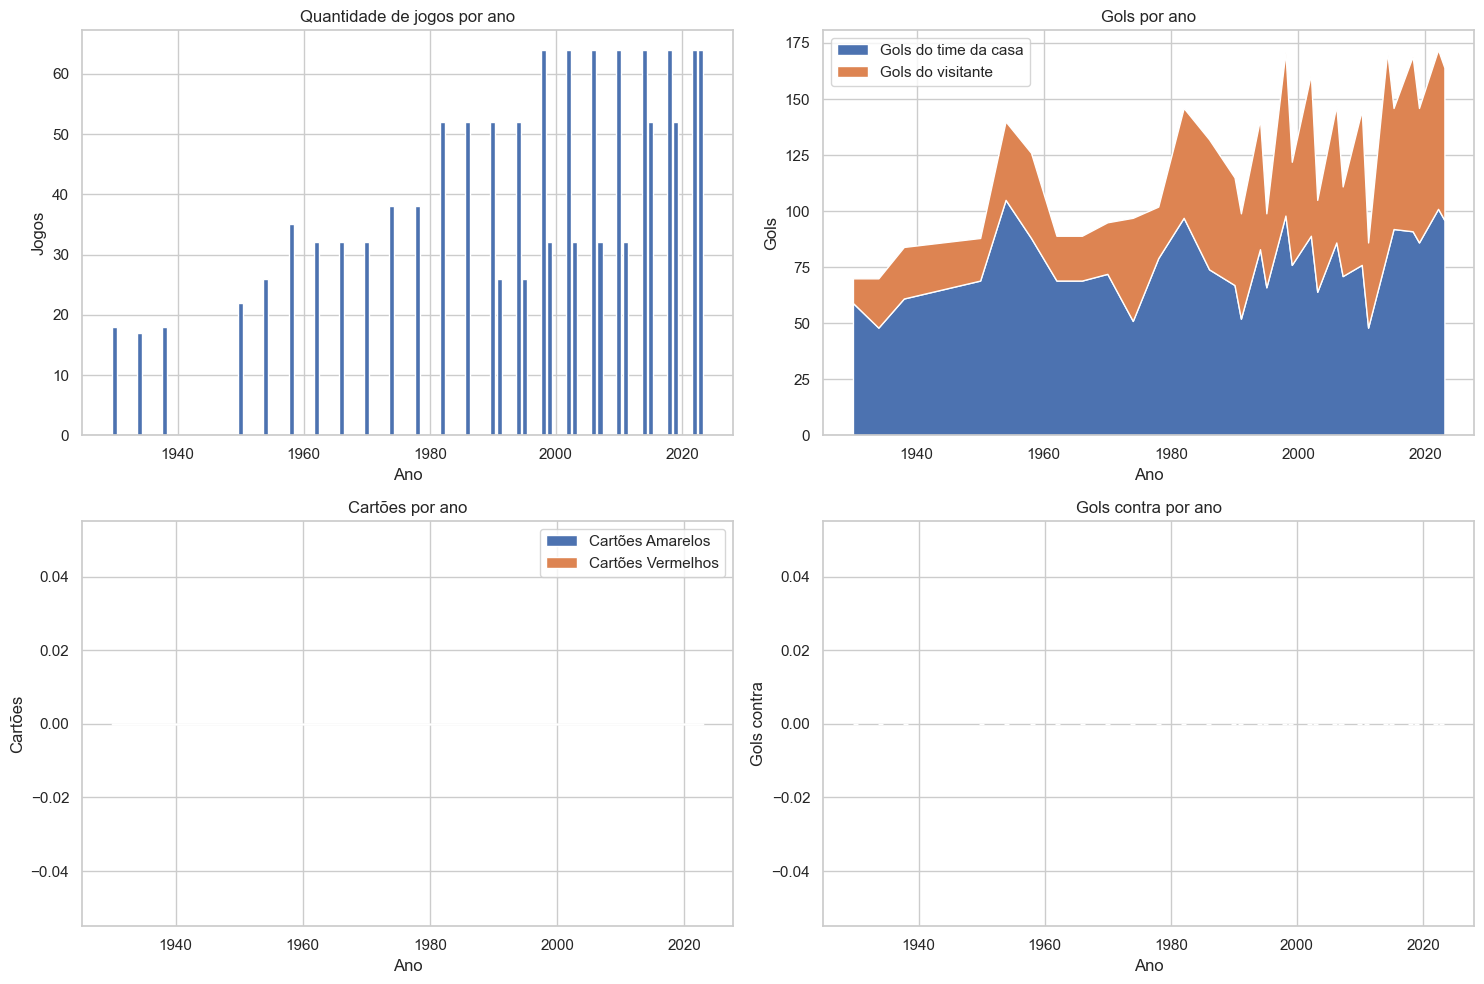

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. CARREGAR ARQUIVO
# ---------------------------------------------------------
df = pd.read_csv("wc_formatado.csv")

# ---------------------------------------------------------
# 2. IDENTIFICAR A COLUNA DO ANO
# ---------------------------------------------------------
year_col = None
for c in df.columns:
    if c.lower() in ["year", "ano", "ano_copa", "year_match"]:
        year_col = c
        break

if year_col is None:
    raise ValueError("❌ Nenhuma coluna referente a 'year' encontrada no CSV.")

df[year_col] = pd.to_numeric(df[year_col], errors="coerce")

# ---------------------------------------------------------
# 3. GARANTIR QUE TODAS AS COLUNAS NUMÉRICAS SÃO NÚMEROS
# ---------------------------------------------------------
numeric_cols = [
    "gols_1", "gols_2",
    "cartao_amarelo_1", "cartao_amarelo_2",
    "cartao_vermelho_1", "cartao_vermelho_2",
    "gols_contra_1", "gols_contra_2"
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)
    else:
        df[col] = 0  # ← se não existe, cria com zero
        print(f"⚠️ Coluna ausente no CSV, criada com zeros → {col}")

# ---------------------------------------------------------
# 4. AGRUPAMENTOS
# ---------------------------------------------------------

# (1) Quantidade de jogos por ano
jogos_ano = df.groupby(year_col).size()

# (2) Gols por ano
gols_ano = df.groupby(year_col)[["gols_1", "gols_2"]].sum()

# (3) Cartões
cartoes_ano = df.groupby(year_col)[
    ["cartao_amarelo_1", "cartao_amarelo_2", "cartao_vermelho_1", "cartao_vermelho_2"]
].sum()

cartoes_amarelos = cartoes_ano["cartao_amarelo_1"] + cartoes_ano["cartao_amarelo_2"]
cartoes_vermelhos = cartoes_ano["cartao_vermelho_1"] + cartoes_ano["cartao_vermelho_2"]

# (4) Gols contra – mesmo que as colunas não existam, agora existem como zero
gols_contra = df.groupby(year_col)[["gols_contra_1", "gols_contra_2"]].sum()
gols_contra_total = gols_contra["gols_contra_1"] + gols_contra["gols_contra_2"]

# ---------------------------------------------------------
# 5. GRÁFICOS
# ---------------------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# --- Linha 1, Coluna 1 ---
axs[0, 0].bar(jogos_ano.index, jogos_ano.values)
axs[0, 0].set_title("Quantidade de jogos por ano")
axs[0, 0].set_xlabel("Ano")
axs[0, 0].set_ylabel("Jogos")

# --- Linha 1, Coluna 2 ---
axs[0, 1].stackplot(
    gols_ano.index,
    gols_ano["gols_1"],
    gols_ano["gols_2"],
    labels=["Gols do time da casa", "Gols do visitante"]
)
axs[0, 1].set_title("Gols por ano")
axs[0, 1].set_xlabel("Ano")
axs[0, 1].set_ylabel("Gols")
axs[0, 1].legend()

# --- Linha 2, Coluna 1 ---
axs[1, 0].stackplot(
    cartoes_ano.index,
    cartoes_amarelos,
    cartoes_vermelhos,
    labels=["Cartões Amarelos", "Cartões Vermelhos"]
)
axs[1, 0].set_title("Cartões por ano")
axs[1, 0].set_xlabel("Ano")
axs[1, 0].set_ylabel("Cartões")
axs[1, 0].legend()

# --- Linha 2, Coluna 2 ---
axs[1, 1].bar(gols_contra_total.index, gols_contra_total.values)
axs[1, 1].set_title("Gols contra por ano")
axs[1, 1].set_xlabel("Ano")
axs[1, 1].set_ylabel("Gols contra")

plt.tight_layout()
plt.show()


⚠️ Criada coluna ausente → gols_contra_1
⚠️ Criada coluna ausente → gols_contra_2


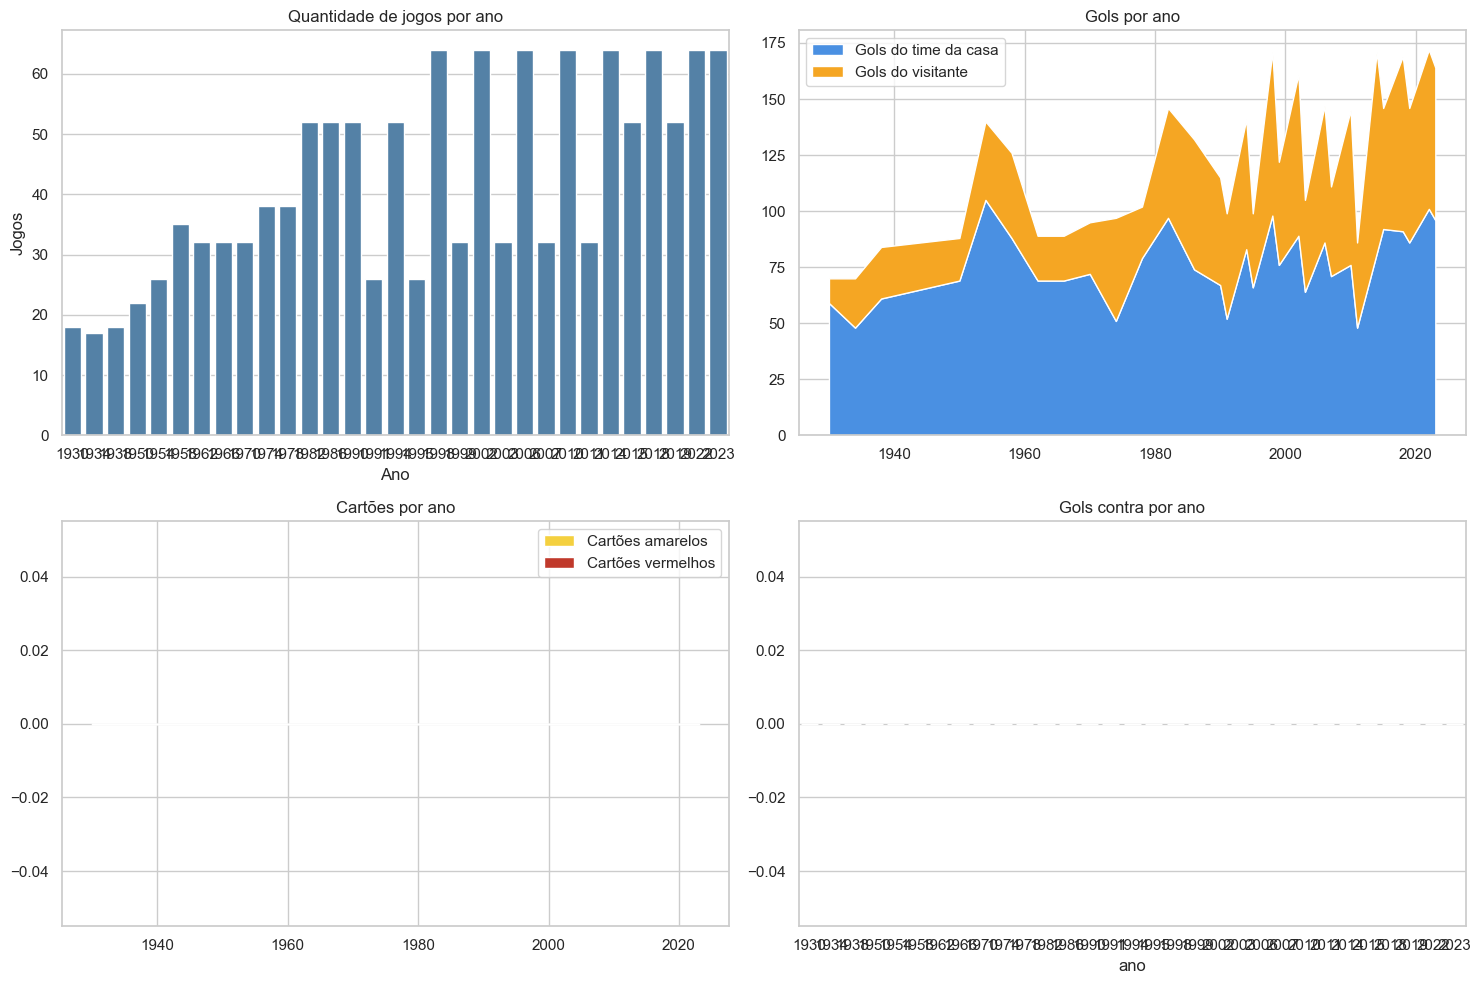

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# CARREGAR CSV
# ---------------------------------------------------------
df = pd.read_csv("wc_formatado.csv")

# Detectar coluna do ano
year_col = None
for c in df.columns:
    if c.lower() in ["year", "ano", "ano_copa", "year_match"]:
        year_col = c
        break
if year_col is None:
    raise ValueError("Nenhuma coluna de ano encontrada.")

df[year_col] = pd.to_numeric(df[year_col], errors="coerce")

# Garantir colunas numéricas
numeric_cols = [
    "gols_1", "gols_2",
    "cartao_amarelo_1", "cartao_amarelo_2",
    "cartao_vermelho_1", "cartao_vermelho_2",
    "gols_contra_1", "gols_contra_2"
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)
    else:
        df[col] = 0
        print(f"⚠️ Criada coluna ausente → {col}")

# ---------------------------------------------------------
# AGREGADOS
# ---------------------------------------------------------
jogos_ano = df.groupby(year_col).size()
gols_ano = df.groupby(year_col)[["gols_1", "gols_2"]].sum()

cartoes_ano = df.groupby(year_col)[[
    "cartao_amarelo_1", "cartao_amarelo_2",
    "cartao_vermelho_1", "cartao_vermelho_2"
]].sum()

cartoes_amarelos = cartoes_ano["cartao_amarelo_1"] + cartoes_ano["cartao_amarelo_2"]
cartoes_vermelhos = cartoes_ano["cartao_vermelho_1"] + cartoes_ano["cartao_vermelho_2"]

gols_contra = df.groupby(year_col)[["gols_contra_1", "gols_contra_2"]].sum()
gols_contra_total = gols_contra["gols_contra_1"] + gols_contra["gols_contra_2"]

# ---------------------------------------------------------
# GRÁFICOS - SEABORN
# ---------------------------------------------------------
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# --- (1) Jogos por ano ---
sns.barplot(x=jogos_ano.index, y=jogos_ano.values, ax=axs[0, 0], color="steelblue")
axs[0, 0].set_title("Quantidade de jogos por ano")
axs[0, 0].set_xlabel("Ano")
axs[0, 0].set_ylabel("Jogos")

# --- (2) Gols por ano ---
axs[0, 1].stackplot(
    gols_ano.index,
    gols_ano["gols_1"],
    gols_ano["gols_2"],
    labels=["Gols do time da casa", "Gols do visitante"],
    colors=["#4A90E2", "#F5A623"]
)
axs[0, 1].set_title("Gols por ano")
axs[0, 1].legend()

# --- (3) Cartões por ano ---
axs[1, 0].stackplot(
    cartoes_amarelos.index,
    cartoes_amarelos,
    cartoes_vermelhos,
    labels=["Cartões amarelos", "Cartões vermelhos"],
    colors=["#F4D03F", "#C0392B"]
)
axs[1, 0].set_title("Cartões por ano")
axs[1, 0].legend()

# --- (4) Gols contra por ano ---
sns.barplot(x=gols_contra_total.index, y=gols_contra_total.values,
            ax=axs[1, 1], color="salmon")
axs[1, 1].set_title("Gols contra por ano")

plt.tight_layout()
plt.show()


In [19]:

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ---------------------------------------------------------
# MESMOS DADOS DO SEABORN (ler CSV + tratar colunas)
# ---------------------------------------------------------
df = pd.read_csv("wc_formatado.csv")

year_col = None
for c in df.columns:
    if c.lower() in ["year", "ano", "ano_copa", "year_match"]:
        year_col = c
        break

df[year_col] = pd.to_numeric(df[year_col], errors="coerce")

numeric_cols = [
    "gols_1", "gols_2",
    "cartao_amarelo_1", "cartao_amarelo_2",
    "cartao_vermelho_1", "cartao_vermelho_2",
    "gols_contra_1", "gols_contra_2"
]
for col in numeric_cols:
    if col not in df.columns:
        df[col] = 0
        print(f"⚠️ Criada coluna ausente → {col}")
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# Agregações
jogos_ano = df.groupby(year_col).size()
gols_ano = df.groupby(year_col)[["gols_1", "gols_2"]].sum()
cartoes_ano = df.groupby(year_col)[[
    "cartao_amarelo_1", "cartao_amarelo_2",
    "cartao_vermelho_1", "cartao_vermelho_2"
]].sum()

cartoes_amarelos = cartoes_ano["cartao_amarelo_1"] + cartoes_ano["cartao_amarelo_2"]
cartoes_vermelhos = cartoes_ano["cartao_vermelho_1"] + cartoes_ano["cartao_vermelho_2"]

gols_contra = df.groupby(year_col)[["gols_contra_1", "gols_contra_2"]].sum()
gols_contra_total = gols_contra["gols_contra_1"] + gols_contra["gols_contra_2"]

# ---------------------------------------------------------
# GRÁFICOS PLOTLY
# ---------------------------------------------------------
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Quantidade de jogos por ano",
        "Gols por ano",
        "Cartões por ano",
        "Gols contra por ano"
    ]
)

# --- (1) Jogos por ano ---
fig.add_trace(
    go.Bar(x=jogos_ano.index, y=jogos_ano.values, name="Jogos"),
    row=1, col=1
)

# --- (2) Gols por ano ---
fig.add_trace(
    go.Scatter(
        x=gols_ano.index,
        y=gols_ano["gols_1"],
        stackgroup="g",
        name="Gols do time da casa"
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=gols_ano.index,
        y=gols_ano["gols_2"],
        stackgroup="g",
        name="Gols do visitante"
    ),
    row=1, col=2
)

# --- (3) Cartões por ano ---
fig.add_trace(
    go.Scatter(
        x=cartoes_amarelos.index,
        y=cartoes_amarelos,
        stackgroup="c",
        name="Cartões amarelos"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=cartoes_vermelhos.index,
        y=cartoes_vermelhos,
        stackgroup="c",
        name="Cartões vermelhos"
    ),
    row=2, col=1
)

# --- (4) Gols contra por ano ---
fig.add_trace(
    go.Bar(x=gols_contra_total.index, y=gols_contra_total.values, name="Gols contra"),
    row=2, col=2
)

fig.update_layout(
    title="Estatísticas históricas da Copa do Mundo",
    height=900,
    width=1100,
    showlegend=True
)

fig.show()


⚠️ Criada coluna ausente → gols_contra_1
⚠️ Criada coluna ausente → gols_contra_2
